# Sentiment analysis imdb/Reuters datasets

## imdb classification model

Movie reviews are classified into positive/negative.
We build a neural network as follows:
we start by by an embedding layer and connect it to 2 Dense layers ending with sigmoid layer (Sigmoid is useful for binary classification)

In [6]:
import pyprind
import pandas as pd
from string import punctuation
import re
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.text import text_to_word_sequence, hashing_trick
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
import tensorflow.keras as keras
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dense, LSTM, SpatialDropout1D
from keras.datasets import imdb
from keras.utils import to_categorical
from keras.layers import Flatten

#preparing data
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=10000)
#print(y_train)
X_train=pad_sequences(X_train,maxlen=250)
X_test=pad_sequences(X_test,maxlen=250)
#y_train=to_categorical(y_train,num_classes=2)
#y_test=to_categorical(y_test,num_classes=2)
#print(X_train.shape)
sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)
#y_train = np.asarray(y_train).astype('float32')
#y_test = np.asarray(y_test).astype('float32')
#neural network
model = Sequential()
model.add(Embedding(10001, 50, input_length=250))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=16,input_dim=16,activation='relu'))
#model.add(Dense(units=16,input_dim=16,activation='tanh'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
history_imdb=model.fit(X_train, y_train, epochs=10, batch_size=512,validation_split=0.1)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=516)
print('Test score imdb classification: %.2f' % score)
print('Test accuracy imdb classification: %.2f' % acc)



C:\Users\marwe\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 4s 198us/step - loss: 0.6895 - accuracy: 0.5298 - val_loss: 0.6756 - val_accuracy: 0.6608
Epoch 2/10
22500/22500 [==============================] - 3s 148us/step - loss: 0.5664 - accuracy: 0.7548 - val_loss: 0.4206 - val_accuracy: 0.8272
Epoch 3/10
22500/22500 [==============================] - 3s 148us/step - loss: 0.3009 - accuracy: 0.8832 - val_loss: 0.3095 - val_accuracy: 0.8732
Epoch 4/10
22500/22500 [==============================] - 3s 149us/step - loss: 0.2086 - accuracy: 0.9208 - val_loss: 0.2985 - val_accuracy: 0.8840
Epoch 5/10
22500/22500 [==============================] - 3s 155us/step - loss: 0.1635 - accuracy: 0.9404 - val_loss: 0.3109 - val_accuracy: 0.8784
Epoch 6/10
22500/22500 [==============================] - 3s 150us/step - loss: 0.1339 - accuracy: 0.9538 - val_loss: 0.3204 - val_accuracy: 0.8796
Epoch 7/10
22500/22500 [==============================] - 3s 15

## Reuters classification model

Reuters news headlines are classified into 46 news categories .
We build a neural network as follows:
we start by by an embedding layer and connect it to 2 Dense layers ending with a dense softmax layer (softmax is useful for categorical classification)

In [7]:
#Reuters
from keras.datasets import reuters
(X_train, y_train), (X_test, y_test) = reuters.load_data(
num_words=10000)
#print(np.unique(y_train))
#print(len(X_train[0]))

X_train=pad_sequences(X_train,maxlen=300)
X_test=pad_sequences(X_test,maxlen=300)
y_train=to_categorical(y_train,num_classes=46)
y_test=to_categorical(y_test,num_classes=46)

model = Sequential()
model.add(Embedding(10001, 50, input_length=300))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=64,input_dim=64,activation='relu'))
#model.add(Dense(units=80,input_dim=150,activation='tanh'))
model.add(Flatten())
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history_reuters=model.fit(X_train, y_train, epochs=15, batch_size=512,validation_split=0.1)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=516)
print('Test score Reuters classification: %.2f' % (score))
print('Test accuracy Reuters classification: %.2f' %(acc))

C:\Users\marwe\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8083 samples, validate on 899 samples
Epoch 1/15
8083/8083 [==============================] - 5s 627us/step - loss: 2.4693 - accuracy: 0.3313 - val_loss: 2.2469 - val_accuracy: 0.3893
Epoch 2/15
8083/8083 [==============================] - 4s 534us/step - loss: 2.0529 - accuracy: 0.4417 - val_loss: 2.0140 - val_accuracy: 0.4549
Epoch 3/15
8083/8083 [==============================] - 4s 529us/step - loss: 1.7824 - accuracy: 0.5249 - val_loss: 1.7788 - val_accuracy: 0.5551
Epoch 4/15
8083/8083 [==============================] - 4s 531us/step - loss: 1.5149 - accuracy: 0.6015 - val_loss: 1.6497 - val_accuracy: 0.6207
Epoch 5/15
8083/8083 [==============================] - 4s 540us/step - loss: 1.2742 - accuracy: 0.6629 - val_loss: 1.5605 - val_accuracy: 0.6218
Epoch 6/15
8083/8083 [==============================] - 4s 532us/step - loss: 1.0166 - accuracy: 0.7355 - val_loss: 1.5367 - val_accuracy: 0.6307
Epoch 7/15
8083/8083 [==============================] - 4s 525us/step - loss:

## Plotting accuracy graphs for imdb/Reuters

We plot graphs summarizing the findings of the 2 previous models.
We can see that that our Reuters model suffers from overfitting which suggests we might not have the optimal neural network architecture (LSTM might help solve this problem)

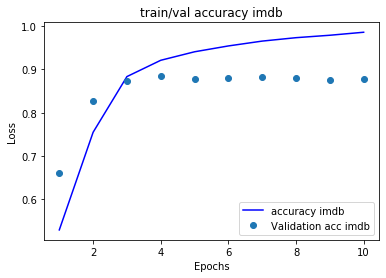

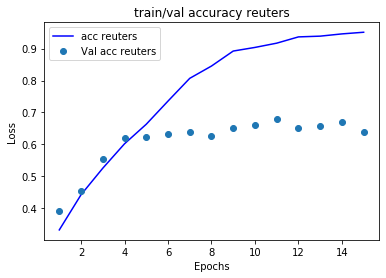

In [16]:
import matplotlib.pyplot as plt

history_dict = history_imdb.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='accuracy imdb')
plt.plot(epochs, val_loss_values, 'o', label='Validation acc imdb')
plt.title('train/val accuracy imdb')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


history_dict = history_reuters.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='acc reuters')
plt.plot(epochs, val_loss_values, 'o', label='Val acc reuters')
plt.title('train/val accuracy reuters')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
